In [73]:
%matplotlib inline
#computation
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style("ticks", {'axes.grid' : True})
# pl.rc("figure", facecolor="white",figsize = (3,2))
pl.rc("figure", facecolor="gray",figsize = (8,8))

pl.rc('text', usetex=True)
pl.rc('text.latex', preamble=[r'\usepackage{amsmath}'])
pl.rc('lines',markeredgewidth = 2)
pl.rc('font',size = 12)
# params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
# pyplot.rcParams.update(params)

#utils
# import time
# from copy import deepcopy
# from functools import partial
# import itertools
# from importlib import reload

#notebook config
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Math

from itertools import product
from scipy import special

In [2]:
import scipy.io as spio
mat = spio.loadmat('../data/both_monkeys_lip.mat', squeeze_me=True)

In [50]:
mat['both_monkeys_lip'].flatten().dtype.names

('date',
 'dots2',
 'dots4',
 'memory',
 'overlap',
 'depth',
 'dots8',
 'prefdir',
 'whichunit',
 'complete',
 'prefire',
 'iscomplete',
 'location',
 'angcont',
 'dots8_partial',
 'prefire_time',
 'dotfire',
 'sacfire',
 'sacfireNULL',
 'dotfireNULL',
 'sacfirert',
 'dotfirert',
 'sacfireRT_NULL',
 'dotfireRT_NULL',
 'dotfirertNULL',
 'sacfirertNULL',
 'anglecontrol',
 'otherdirs',
 'allnums',
 'newit',
 'rts',
 'anglecontrol45',
 'monkey',
 'plx_new',
 'ind')

example micro structure

In [52]:
list(mat['both_monkeys_lip'][0]['allnums'][1]['data'][0]['dotfire_time'][0]['spiketimes'][0].tolist())

[720.5500000000029,
 497.1750000000029,
 array([-1129, -1044,  -963,  -682,  -656,  -621,  -612,  -603,  -509,
         -452,  -424,  -392,  -365,  -291,  -205,  -178,  -166,  -150,
         -130,  -120,   -77,    80,    94,   101,   110,   117,   151,
          269,   317,   381,   391,   429,   465,   576,   659,   666,
          704,   735,   742,   767,   888], dtype=int16),
 array([-1850, -1765, -1684, -1403, -1377, -1342, -1333, -1324, -1230,
        -1173, -1145, -1113, -1086, -1012,  -926,  -899,  -887,  -871,
         -851,  -841,  -798,  -641,  -627,  -620,  -611,  -604,  -570,
         -452,  -404,  -340,  -330,  -292,  -256,  -145,   -62,   -55,
          -17,    14,    21,    46,   167], dtype=int16),
 array([-632, -547, -466, -185, -159, -124, -115, -106,  -12,   45,   73,
         105,  132,  206,  292,  319,  331,  347,  367,  377,  420],
       dtype=int16),
 0,
 135,
 2]

In [53]:
mat['both_monkeys_lip'][0]['allnums'][1]['data'][0]['dotfire_time'][0]['spiketimes'][0].dtype.names

('rt', 'targtodots', 'dots', 'sacc', 'targ', 'coh', 'dir', 'numtargs')

convert to dataframe

In [5]:
raw_data=mat['both_monkeys_lip'].flatten()
col_names=raw_data.dtype.names
df_data=pd.DataFrame(columns=col_names)
for col_name in col_names:
    df_data[col_name]=raw_data[col_name]
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,sacfirertNULL,anglecontrol,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new,ind
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],[],"[[[], []], [[(array([[ 0. , 11.538632...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1
1,012505,2-4_2,2-4_2,memory_2,overlap_2,3250,8_2,100,1,1,...,[],[],[],"[[[], []], [[(array([[ 0. , 2.384501...",[],"[[[]], [[[ 0. 677.04886364 33.717126...",[],1,0,2
2,020105,2-4_8b,2-4_8b,memory_8,overlap_8,1805,[],90,1,0,...,[],[],[],"[[[], []], [[(array([[ 0. , 19.127800...",[],"[[[]], [[[ 0. 586.31071429 58.348952...",[],1,0,3
3,021005,2-4_x,2-4_x,memory_8,overlap_8,3650,8_8,135,1,[],...,[],[],[],"[[[], []], [[(array([[ 0. , 7.872498...",[],"[[[]], [[[ 0. 577.21309524 17.372067...",[],1,0,4
4,021705,2-4_4,2-4_4,memory_4,overlap_4,1925,[],180,1,1,...,[],[],[],"[[[], []], [[(array([[ 0. , 51.306610...",[],"[[[]], [[[ 0. 666.02857143 40.883048...",[],1,0,5


In [6]:
df_data.iloc[0].allnums[1].dtype.names

('data', 'prefire')

Explode choice experiments

In [7]:
df_data.allnums=df_data.allnums.apply(lambda row: [(2,row[1]),(4,row[3])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True)
df_data['choice_exp']=df_data.allnums.apply(lambda row:row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]) #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,anglecontrol,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new,ind,choice_exp
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],[[[[[ 0. 11.5386323 ]\n [ 32. ...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],[],[[[[[ 0. 11.26096271]\n [ 32. ...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,4
2,012505,2-4_2,2-4_2,memory_2,overlap_2,3250,8_2,100,1,1,...,[],[],[[[[[ 0. 2.38450132]\n [ 32. ...,[],"[[[]], [[[ 0. 677.04886364 33.717126...",[],1,0,2,2
3,012505,2-4_2,2-4_2,memory_2,overlap_2,3250,8_2,100,1,1,...,[],[],[[[[[ 0. 2.84936826]\n [ 32. ...,[],"[[[]], [[[ 0. 677.04886364 33.717126...",[],1,0,2,4
4,020105,2-4_8b,2-4_8b,memory_8,overlap_8,1805,[],90,1,0,...,[],[],[[[[[ 0. 19.12780035]\n [ 32. ...,[],"[[[]], [[[ 0. 586.31071429 58.348952...",[],1,0,3,2


In [8]:
df_data.iloc[0].allnums.dtype.names

('data', 'prefire')

explode particular choice

In [9]:
df_data.allnums=df_data.allnums.apply(lambda row: [[idx,data] for idx,data in zip(range(len(row['data'])),row['data'])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True).dropna()
df_data['choice']=df_data.allnums.apply(lambda row: row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]) #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,otherdirs,allnums,newit,rts,anglecontrol45,monkey,plx_new,ind,choice_exp,choice
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[0.0, 11.538632301799042], [32.0, 12.2697705...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[0.0, 11.038341941779667], [32.0, 9.64652378...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,1
2,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[0.0, 11.260962708208094], [32.0, 12.4999999...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,4,0
3,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[0.0, 9.319130069840227], [32.0, 8.691915599...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,4,1
4,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[0.0, 7.364643316389879], [32.0, 11.02416517...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,4,2


In [10]:
df_data.iloc[0].allnums.dtype.names

('prefire',
 'prefire_time',
 'dotfire',
 'dotfire_time',
 'sacfire',
 'sacfire_time',
 'dir')

explode coherence

In [11]:
df_data.allnums=df_data.allnums.apply(lambda row: [(coherence,data) for coherence,data in zip(row['dotfire_time']['coh'],row['dotfire_time'])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True)
df_data['coherence']=df_data.allnums.apply(lambda row:row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]).dropna() #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,allnums,newit,rts,anglecontrol45,monkey,plx_new,ind,choice_exp,choice,coherence
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[[[-520.0, 0.0], [-480.0, 10.271460014673513],...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,0
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[[[-480.0, 8.383233532934131], [-440.0, 17.045...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,32
2,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[[[-520.0, 15.873015873015872], [-480.0, 10.40...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,64
3,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[[[-520.0, 0.0], [-480.0, 9.066183136899365], ...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,128
4,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,"[[[-480.0, 7.363770250368188], [-440.0, 11.428...",[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,256


In [12]:
df_data.iloc[0].allnums.dtype.names

('data', 'coh', 'pspike', 'spiketimes', 'numtrials_dots')

In [13]:
df_data.allnums.apply(lambda row:row['spiketimes'].shape==()).sum()

6

In [14]:
df_data.allnums.apply(lambda row:row['spiketimes'].shape==(0,)).sum()

5

Drop emtpy data

In [15]:
drop_cond=df_data.allnums.apply(lambda row:(row['spiketimes'].shape==(0,)) | (row['spiketimes'].shape==()))
df_data=df_data.drop(df_data[drop_cond].index)

explode trials

In [16]:
df_data.allnums=df_data.allnums.apply(lambda row: [(trial,data) for trial,data in zip(range(len(row['spiketimes'])),row['spiketimes'])])   #pull out and label each experiment
df_data=df_data.explode('allnums',ignore_index=True)
df_data['trial']=df_data.allnums.apply(lambda row:row[0]) #pull out label
df_data.allnums=df_data.allnums.apply(lambda row:row[1]) #overwrite without label
df_data.head()

,date,dots2,dots4,memory,overlap,depth,dots8,prefdir,whichunit,complete,...,newit,rts,anglecontrol45,monkey,plx_new,ind,choice_exp,choice,coherence,trial
0,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,0,0
1,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,0,1
2,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,0,2
3,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,0,3
4,012605,2-4_2,2-4_2,memory_2,overlap_2,9999999,[],135,1,1,...,[],"[[[]], [[[ 0. 714.71036585 23.430024...",[],1,0,1,2,0,0,4


In [17]:
df_data.iloc[0].allnums.dtype.names

('rt', 'targtodots', 'dots', 'sacc', 'targ', 'coh', 'dir', 'numtargs')

assign data structure

In [18]:
for col_name in df_data.iloc[0].allnums.dtype.names:
    df_data[col_name]=df_data.allnums.apply(lambda row:row[col_name]) 
df_data=df_data.drop(labels='allnums',axis=1)

In [19]:
list(df_data.columns)

['date',
 'dots2',
 'dots4',
 'memory',
 'overlap',
 'depth',
 'dots8',
 'prefdir',
 'whichunit',
 'complete',
 'prefire',
 'iscomplete',
 'location',
 'angcont',
 'dots8_partial',
 'prefire_time',
 'dotfire',
 'sacfire',
 'sacfireNULL',
 'dotfireNULL',
 'sacfirert',
 'dotfirert',
 'sacfireRT_NULL',
 'dotfireRT_NULL',
 'dotfirertNULL',
 'sacfirertNULL',
 'anglecontrol',
 'otherdirs',
 'newit',
 'rts',
 'anglecontrol45',
 'monkey',
 'plx_new',
 'ind',
 'choice_exp',
 'choice',
 'coherence',
 'trial',
 'rt',
 'targtodots',
 'dots',
 'sacc',
 'targ',
 'coh',
 'dir',
 'numtargs']

In [20]:
len(df_data)

41088

In [21]:
(df_data.coherence!=df_data.coh).sum()

0

## Reward rates

from Churchland 2008 ratio of reward rates between contexts matches ratio of fitted half maximums of neural urgency within 10% error

In [42]:
halfmax_para_4ch_to_2ch=343/133

In [49]:
RR_2ch

array([0.79365079, 0.76899177, 0.74581889, 0.72400176, 0.70342475,
       0.68398508, 0.66559096, 0.64816027, 0.63161924, 0.61590146,
       0.60094695, 0.58670143, 0.57311567, 0.56014485, 0.54774815,
       0.53588828, 0.5245311 , 0.51364533, 0.5032022 , 0.49317525,
       0.4835401 , 0.47427422, 0.46535677, 0.45676848, 0.44849144,
       0.44050903, 0.43280581, 0.42536736, 0.41818028, 0.41123203,
       0.40451091, 0.39800595, 0.39170689, 0.38560411, 0.37968858,
       0.3739518 , 0.3683858 , 0.36298306, 0.3577365 , 0.35263945,
       0.34768561, 0.34286902, 0.33818405, 0.3336254 , 0.329188  ,
       0.3248671 , 0.32065816, 0.31655688, 0.3125592 , 0.30866122,
       0.30485927, 0.30114984, 0.2975296 , 0.29399537, 0.29054411,
       0.28717294, 0.28387911, 0.28065998, 0.27751303, 0.27443588,
       0.27142622, 0.26848186, 0.26560069, 0.2627807 , 0.26001996,
       0.25731663, 0.25466893, 0.25207516, 0.2495337 , 0.24704297,
       0.24460147, 0.24220776, 0.23986044, 0.23755819, 0.23529

Text(0, 0.5, '$\\rho_{\\textrm{4-choice}}/\\rho_{\\textrm{2-choice}}$')

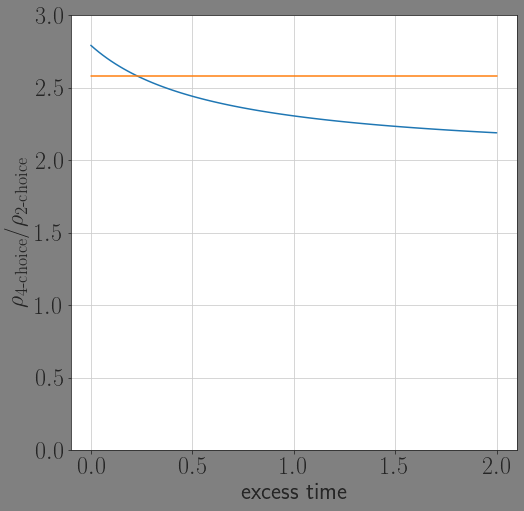

In [46]:
fig,ax=pl.subplots()
excess_time=np.linspace(0,2,100)
#all for zero coherence
mean_time_2ch=0.63
mean_time_4ch=0.88
acc_2ch=1/2
acc_4ch=1/4
RR_2ch=acc_2ch/(mean_time_2ch+excess_time)
RR_4ch=acc_4ch/(mean_time_4ch+excess_time)
ax.plot(excess_time,RR_2ch/RR_4ch)

ax.plot(excess_time,halfmax_para_4ch_to_2ch*np.ones(excess_time.shape))
ax.set_ylim(0,3)
ax.set_xlabel('excess time')
ax.set_ylabel(r'$\rho_{\textrm{4-choice}}/\rho_{\textrm{2-choice}}$')

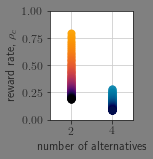

In [79]:
fig,ax=pl.subplots(figsize=(1.5,2))
colorsre = pl.cm.inferno_r(np.linspace(0.2, 1., len(excess_time)))
colorsbl = pl.cm.ocean_r(np.linspace(0.3, 0.7, len(excess_time)))
for eit,ex_t in enumerate(excess_time):
    ax.plot([2],[acc_2ch/(mean_time_2ch+ex_t)],'o',color=colorsre[eit])
    ax.plot([4],[acc_4ch/(mean_time_4ch+ex_t)],'o',color=colorsbl[eit])
ax.set_xlabel('number of alternatives')
ax.set_ylabel(r'reward rate, $\rho_c$')
ax.set_xticks([2,4])
ax.set_xlim(1,5)
ax.set_ylim(0,1.0)
fig.savefig('LIP_rewardrate.pdf',transparent=True,bbox_inches='tight',dpi=300)

In [ ]:
reward_seq=

In [23]:
dftmp=df_data.loc[:,('choice_exp','coherence','rt')]

In [25]:
dftmp.groupby(by=['choice_exp','coherence'])['rt'].mean()

choice_exp  coherence
2           0            628.289812
            32           608.540782
            64           588.247056
            90           570.306649
            128          532.789789
            256          438.582948
            512          333.014623
            724          324.625896
            768          300.758181
4           0            877.357853
            32           823.544811
            64           706.803531
            90           760.033450
            128          619.493838
            256          489.398246
            512          342.633803
            724          339.899588
            768          310.192532
Name: rt, dtype: float64

## Urgency

get Tin and Tout groups to make urgency

In [22]:
df_data.dir.unique()

array([135, 315,  45, 225, 100, 280,  10, 190,  90, 270,   0, 180,  65,
       245, 155, 335,  70, 250, 160, 340,  35, 215, 125, 305,  20, 200,
       110, 290,  12, 192, 102, 282,  40, 220, 130, 310,  25, 205, 115,
       295,  15, 195, 105, 285,  55, 235, 145, 325, 170, 350,  80, 260,
        30, 210, 120, 300, 140, 320,  50, 230, 150, 330,  60, 240,  58,
       238, 148, 328], dtype=int64)

In [23]:
df_data.prefdir.unique()

array([135, 100, 90, 180, 245, 225, 250, 215, 190, 155, 200, 270, 192,
       220, 205, 195, 235, 170, 210, 140, 315, 280, 330, 340, 25, 350,
       260, 60, 238, 45, 20], dtype=object)

In [24]:
(df_data.prefdir==df_data.dir).sum()/len(df_data)

0.34569704049844235

In [25]:
Tin_cond=(df_data.prefdir==df_data.dir)
Tout_cond=(df_data.prefdQuir!=df_data.dir)
rec_field_cond={'Tin':Tin_cond,'Tout':Tout_cond}

In [26]:
df_data.trial.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74], dtype=int64)

In [47]:
urgency_data=dict.fromkeys(['Tin','Tout'])
RT_data=dict.fromkeys(['Tin','Tout'])
for is_rec_field in urgency_data.keys():
    urgency_data[is_rec_field]=dict.fromkeys([2,4])
    RT_data[is_rec_field]=dict.fromkeys([2,4])
    for choice_exp in [2,4]:
        coherences=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp)].coherence.unique()
        urgency_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        RT_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        for coherence in coherences:
            spike_time_data=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp) & (df_data.coherence==coherence)].dots
            num_trials=len(spike_time_data)
            spike_times=spike_time_data.explode().values
            bins=np.arange(0,1000,20)
            urgency_data[is_rec_field][choice_exp][coherence]=(num_trials,np.histogram(spike_times,bins=bins))
            
            response_times=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp) & (df_data.coherence==coherence)].rt
            RT_data[is_rec_field][choice_exp][coherence]=(np.histogram(response_times,bins=bins))
            

C:\Users\mptouzel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:989: RuntimeWarning: invalid value encountered in greater
  a.sort(axis=axis, kind=kind, order=order)
C:\Users\mptouzel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:989: RuntimeWarning: invalid value encountered in less
  a.sort(axis=axis, kind=kind, order=order)
C:\Users\mptouzel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:989: RuntimeWarning: invalid value encountered in less
  a.sort(axis=axis, kind=kind, order=order)
C:\Users\mptouzel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:989: RuntimeWarning: invalid value encountered in greater
  a.sort(axis=axis, kind=kind, order=order)
C:\Users\mptouzel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:989: RuntimeWarning: invalid value encountered in greater
  a.sort(axis=axis, kind=kind, order=order)
C:\Users\mptouzel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:989: RuntimeWarning: invalid value encountered in less
  a.sort(

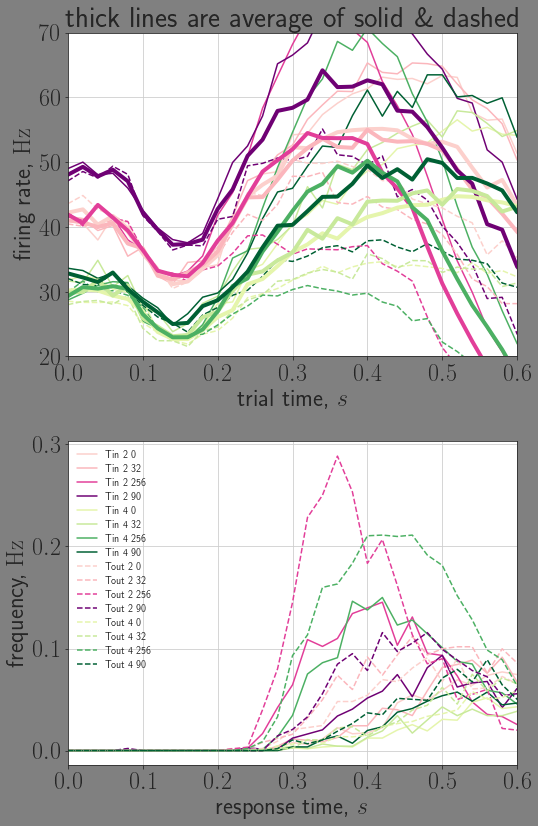

In [48]:
fig,ax=pl.subplots(2,1,figsize=(8,12))
colstr2=pl.cm.RdPu(np.linspace(0.2,1.0,len(urgency_data[is_rec_field][2].keys())))
colstr4=pl.cm.YlGn(np.linspace(0.2,1.0,len(urgency_data[is_rec_field][4].keys())))
colstrvec=(colstr2,colstr4)
for rit,is_rec_field in enumerate(urgency_data.keys()):
    for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
        for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
            if coherence in [0,32,90,256]:
                num_trials,histdata=urgency_data[is_rec_field][choice_exp][coherence]
                counts,bins=histdata
                RT_counts,bins=RT_data[is_rec_field][choice_exp][coherence]
                if rit==0:
                    ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000/num_trials,'-',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                    ax[1].plot(bins[:-1]/1000,RT_counts/np.sum(counts)/np.diff(bins)*1000,'-',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                else:
                    ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000/num_trials,'--',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))
                    ax[1].plot(bins[:-1]/1000,RT_counts/np.sum(counts)/np.diff(bins)*1000,'--',color=colstrvec[cit][coit],label=is_rec_field+' '+str(choice_exp)+' '+str(coherence))

# for rit,is_rec_field in enumerate(urgency_data.keys()):
for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
    for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
        if coherence in [0,32,90,256]:
            num_trials_in,histdata_in=urgency_data['Tin'][choice_exp][coherence]
            num_trials_out,histdata_out=urgency_data['Tout'][choice_exp][coherence]
            counts_in,bins=histdata_in
            counts_out,bins=histdata_out
            counts=(counts_in/num_trials_in+ counts_out/num_trials_out)/2
#             counts=counts_in/(num_trials_in+num_trials_out) + counts_out/(num_trials_in+num_trials_out)
            ax[0].plot(bins[:-1]/1000,counts/np.diff(bins)*1000,'-',lw=4,color=colstrvec[cit][coit])


ax[1].legend(frameon=False,prop={"size":10})
ax[0].set_xlabel('trial time, $s$')
ax[0].set_ylabel(r'firing rate, $\textrm{Hz}$')
ax[0].set_ylim([20,70])
ax[0].set_title('thick lines are average of solid \& dashed')
ax[0].set_xlim([0,0.6])
ax[1].set_xlabel('response time, $s$')
ax[1].set_ylabel(r'frequency, $\textrm{Hz}$')
ax[1].set_xlim([0,0.6])
fig.tight_layout()
fig.savefig('LIP_urgency.pdf',transparent=True,bbox_inches='tight',dpi=300)

Correlation with reward rate

In [ ]:
RT_data[is_rec_field]=dict.fromkeys([2,4])
    for choice_exp in [2,4]:
        coherences=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp)].coherence.unique()
        urgency_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        RT_data[is_rec_field][choice_exp]=dict.fromkeys(coherences)
        for coherence in coherences:
            bins=np.arange(0,1000,20)
            response_times=df_data[rec_field_cond[is_rec_field] & (df_data.choice_exp==choice_exp) & (df_data.coherence==coherence)].rt
            RT_data[is_rec_field][choice_exp][coherence]=(np.histogram(response_times,bins=bins))

In [ ]:
Toffset=1.0
df_data['T_trial']=(df_data.rt+1000
df_data['RR']=df_data.pcorratDectime/df_data.T_trial

tcount_store=[]
rcount_store=[]
tbinvec=np.arange(16)
rbinvec=np.linspace(0.02,0.07,40)

for post_interval in block_times:
    counts,bins=np.histogram(df_data[df_data.nPostInterval==post_interval].tDecision,bins=tbinvec)
    tcount_store.append(counts)
    
    counts,bins=np.histogram(df_data[df_data.nPostInterval==post_interval].RR,bins=rbinvec)
    rcount_store.append(counts)

NameError: name 'urgency_data' is not defined

<Figure size 576x576 with 0 Axes>

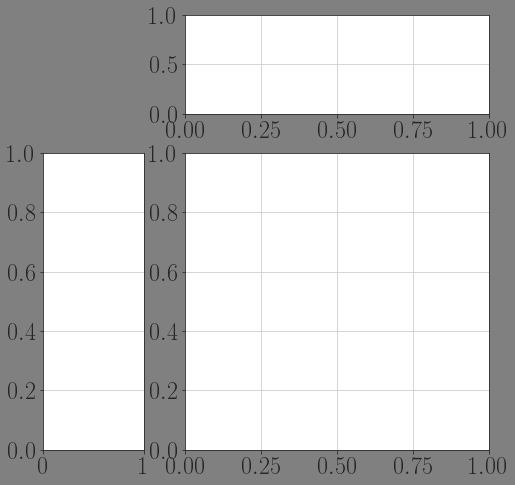

In [68]:
fig=pl.figure()
fig,ax=pl.subplots(nrows=2, ncols=2, gridspec_kw={'width_ratios':[1,3], 'height_ratios':[1,3]})#,hspace=0, wspace=0)
ax[0,0].axis('off')
ax_corr=ax[1,1]
ax_rew=ax[1,0]
ax_times=ax[0,1]
for rit,is_rec_field in enumerate(urgency_data.keys()):
    for cit,choice_exp in enumerate(urgency_data[is_rec_field].keys()):
        for coit,coherence in enumerate(urgency_data[is_rec_field][choice_exp].keys()):
            if coherence in [0,32,90,256]:
                RT_counts,bins=RT_data[is_rec_field][choice_exp][coherence]
                ax_corr.scatter(df_data[df_data.nPostInterval==post_interval].tDecision,df_data[df_data.nPostInterval==post_interval].RR)#,clip_on=False)
                ax_rew.barh(rbinvec[:-1]+0.1*(rbinvec[1]-rbinvec[0]),rcount_store[bit],(rbinvec[1]-rbinvec[0])*0.8,alpha=0.5)#,color=p[-2][0].get_color())  # Stems
                ax_times.bar(bins[:-1]+0.1,RT_counts,0.8,alpha=0.5)#,color=p[-2][0].get_color())  # Stems

ax_corr.yaxis.tick_right()
ax_corr.set_xticks([0,5,10,15])
ax_corr.set_xticklabels([])
ax_corr.set_ylim(0.02,0.07)
ax_corr.set_xlim(0,T)

ax_rew.set_yticks([])
ax_rew.set_xlabel('frequency')
ax_rew.invert_xaxis()
ax_rew.axis('off')

ax_times.set_yticks([])
ax_times.set_xticks([])
ax_times.set_ylabel('frequency')
ax_times.axis('off')

fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('primate_RR_RT_corr_tokens.pdf', transparent=True,bbox_inches="tight",dpi=300)

# These are the distribution of all reaction times:

In [71]:
data.head()

0                                                 [[]]
0    [[[0.0, 714.7103658536539, 23.430024449689615]...
0                                                 [[]]
0    [[[0.0, 831.4292682927231, 35.618468313315276]...
0                                                 [[]]
Name: rts, dtype: object

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'numpy.ndarray'

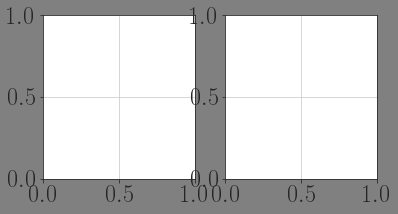

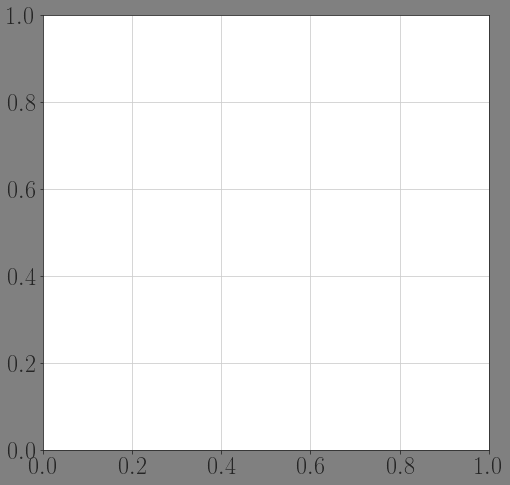

In [70]:
fig1,ax1=pl.subplots(1,2,figsize=(6,3))
fig2,ax2=pl.subplots(1,1)
for task in (2,4):
    time_store=[]
    for idx,times in df_data.loc[df_data['numtargs']==task].rts.items():
        time_store=time_store+list(times)
    counts,bins=np.histogram(time_store,np.linspace(0,2500,50))
    ax1[0].plot(bins[:-1]/1000,counts)
    ax[1].plot([np.mean(time_store)]*2,ax[1].get_ylim(),':')
    surv_func=1-np.cumsum(counts)/np.sum(counts)
    ax1[1].plot(bins[:-1]/1000,surv_func)
    ax2.plot(bins[:-1][bins[:-1]>200]/1000,surv_func[bins[:-1]>200]*(bins[:-1][bins[:-1]>200]-200),label='const '+str(task))
    ax2.plot(bins[:-1][bins[:-1]>200]/1000,np.cumsum(surv_func[bins[:-1]>200]*(2500/50)),label='vary '+str(task))
ax2.set_xlim(200/1000,700/1000)
ax1[0].set_xticks([0,0.5,1,1.5,2,2.5])
ax1[0].set_xticklabels([r'$0$','',r'$1$','',r'$2$',''])
ax1[1].set_xticklabels([r'$0$','',r'$1$','',r'$2$',''])
ax1[1].set_xticks([0,0.5,1,1.5,2,2.5])
ax2.set_xticks([0,0.5,1,1.5,2,2.5])
ax2.set_xticklabels([r'$0$','',r'$1$','',r'$2$',''])
ax2.legend(frameon=False)
# ax2.set_ylim(0,8)
fig1.tight_layout()

In lieu of performance on individual trials, I'm using average preformance (per cell), if that is phi, plotted against the mean reaction time...

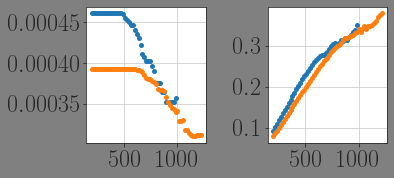

In [7]:
fig,ax=pl.subplots(1,2,figsize=(6,3))
tvecdense=np.linspace(200,2000,100)
for task in (2,4):
    avg_times=df_data.loc[df_data['numtargs']==task].rts.apply(lambda x: np.mean(x))
    P_corr=1/(1+np.exp(-df_data.loc[df_data['numtargs']==task].phi.values.astype('float')))
    RR=P_corr/(avg_times+700)
    posterior_mean=[np.mean(RR[avg_times>t]) for t in tvecdense]
    ax[0].plot(tvecdense,posterior_mean,'.')
    ax[1].plot(tvecdense,posterior_mean*tvecdense,'.')
fig.tight_layout()

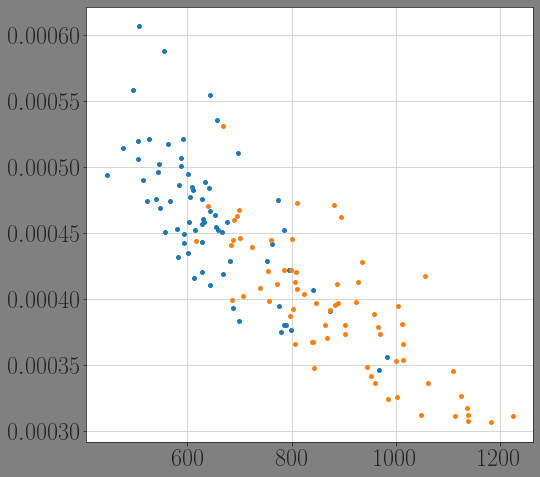

In [8]:
fig,ax=pl.subplots()
for task in (2,4):
    avg_times=df_data.loc[df_data['numtargs']==task].rts.apply(lambda x: np.mean(x))
    P_corr=1/(1+np.exp(-df_data.loc[df_data['numtargs']==task].phi.values.astype('float')))
    RR=P_corr/(avg_times+700)
    ax.plot(avg_times,RR,'.')

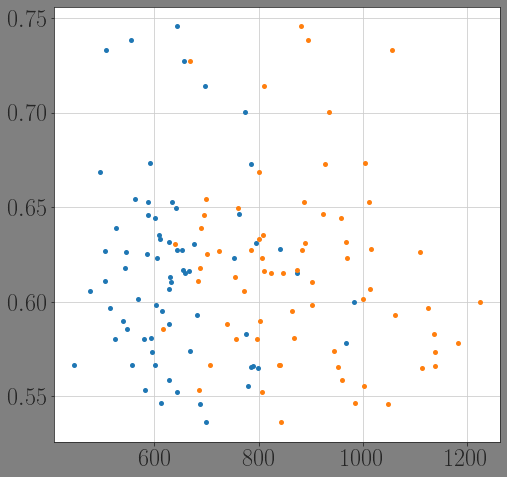

In [9]:
fig,ax=pl.subplots()
for task in (2,4):
    ax.plot(df_data.loc[df_data['numtargs']==task].rts.apply(lambda x: np.mean(x)),1/(1+np.exp(-df_data.loc[df_data['numtargs']==task].phi.values.astype('float'))),'.')

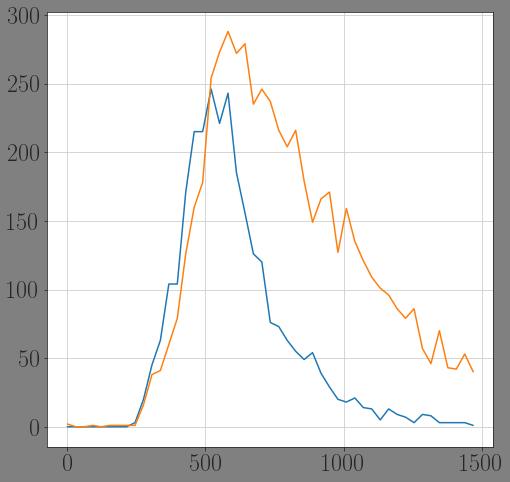

In [10]:
fig,ax=pl.subplots()
for task in (2,4):
    time_store=[]
    for idx,times in df_data.loc[df_data['numtargs']==task].rts.items():
        time_store=time_store+list(times)
    counts,bins=np.histogram(time_store,np.linspace(0,1500,50))
    ax.plot(bins[:-1],counts)